# **Lecture 7: Dimensionality reduction techniques in machine learning**


**Task 1: PCA (Principal Component Analysis)**

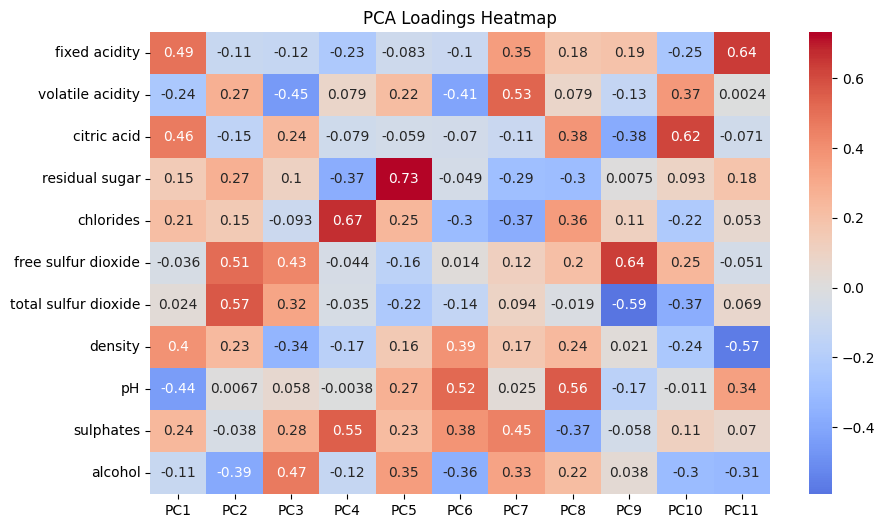

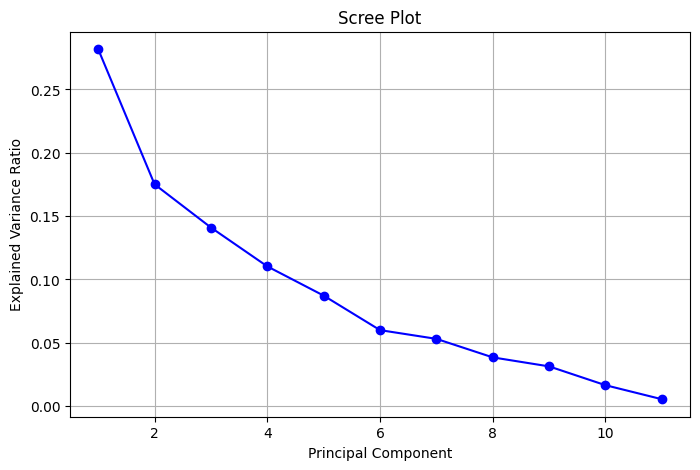

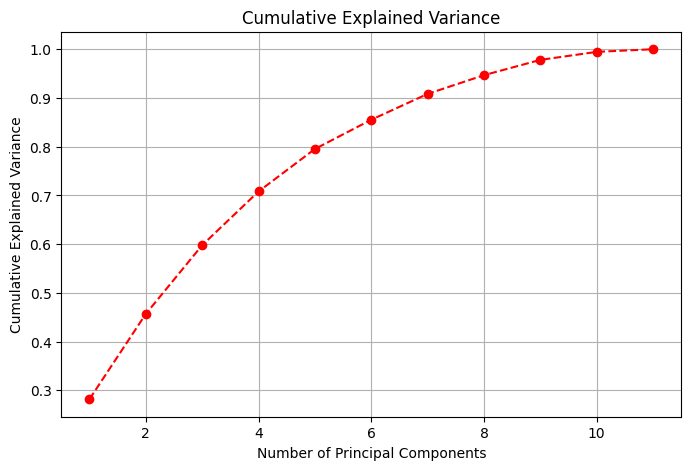

Explained Variance Ratio for each Principal Component:
[0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061 0.0313311  0.01648483 0.00541439]

Cumulative Explained Variance:
[0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967 0.97810077 0.99458561 1.        ]

Important Features for each Principal Component:
PC1            fixed acidity
PC2     total sulfur dioxide
PC3                  alcohol
PC4                chlorides
PC5           residual sugar
PC6                       pH
PC7         volatile acidity
PC8                       pH
PC9      free sulfur dioxide
PC10             citric acid
PC11           fixed acidity
dtype: object


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

X = df.drop('quality', axis=1)  # using only chemical properties for PCA

# Standardize the dataset and Perform PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(X.columns))], index=X.columns)

# Important features for each principal component
important_features = loadings.abs().idxmax()

# Visualize PCA loadings using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(loadings, annot=True, cmap="coolwarm", center=0)
plt.title("PCA Loadings Heatmap")
plt.show()

# Scree Plot to visualize explained variance
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

# Cumulative explained variance plotting
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='r')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

print("Explained Variance Ratio for each Principal Component:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_variance)
print("\nImportant Features for each Principal Component:")
print(important_features)


*Main Keypoints:*

PCA loadings show the correlation between each original feature and each
principal component.

Each cell in the heatmap contains a loading value that shows the relationship between an original feature (like "alcohol" or "pH" in the wine dataset) and a principal component (like PC1 or PC2).

The explained variance for each component is the actual amount of variance that component captures from the data.

The explained variance ratio in PCA represents the proportion of the dataset's total variance that is captured by each principal component.

Cumulative metric helps you understand how many components you need to capture a desired amount of the total variance.

**Task 2: t-SNE (t-Distributed Stochastic Neighbor Embedding)**

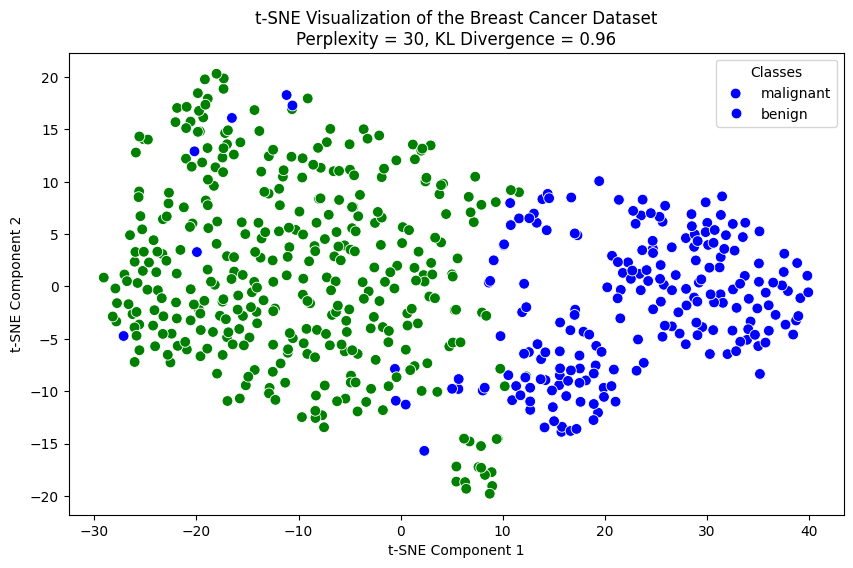

Silhouette Score of t-SNE Clustering: 0.49


In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

perplexity = 30
n_iter = 1000

tsne = TSNE(n_components=2, perplexity=perplexity, max_iter=n_iter, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

palette = {0: 'blue', 1: 'green'}  # 0: benign, 1: malignant

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette=palette, s=60)
plt.title(f't-SNE Visualization of the Breast Cancer Dataset\nPerplexity = {perplexity}, KL Divergence = {tsne.kl_divergence_:.2f}')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(labels=data.target_names, title="Classes")
plt.show()

silhouette = silhouette_score(X_tsne, y)
print(f'Silhouette Score of t-SNE Clustering: {silhouette:.2f}')


*Main Keypoints:*

Standardization is recommended for t-SNE as it helps the algorithm treat each feature equally.

Perplexity in t-SNE is a measure of how well the algorithm balances local vs. global structure.

KL divergence is calculated as part of the t-SNE optimization and helps measure how well the embedding represents data.

The Silhouette Score measures how well-separated the clusters are.

t-SNE provides an effective visualization of the dataset's clusters, helping to understand class distribution and separation.




**Task 3: Compare PCA and t-SNE**

PCA explains variance well but lacks clustering clarity, while t-SNE excels in visual class separation without explaining data variance. PCA actually is good for understanding data spread but lacks clear class separation. t-SNE, on the other hand, preserves local relationships and forms visually distinct clusters but doesn’t capture overall variance or feature importance.

# **Lecture 8: Deep Learning Fundamentals**

**Task 4: Building a Simple Neural Network**

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8703 - loss: 0.4681 - val_accuracy: 0.9532 - val_loss: 0.1634
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9615 - loss: 0.1349 - val_accuracy: 0.9679 - val_loss: 0.1161
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9740 - loss: 0.0888 - val_accuracy: 0.9677 - val_loss: 0.1125
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9822 - loss: 0.0632 - val_accuracy: 0.9693 - val_loss: 0.0998
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9859 - loss: 0.0467 - val_accuracy: 0.9723 - val_loss: 0.0963
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9876 - loss: 0.0375 - val_accuracy: 0.9747 - val_loss: 0.0923
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0290 - val_accuracy: 0.9698 - val_loss: 0.1015
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9929 - loss: 0.0241 -

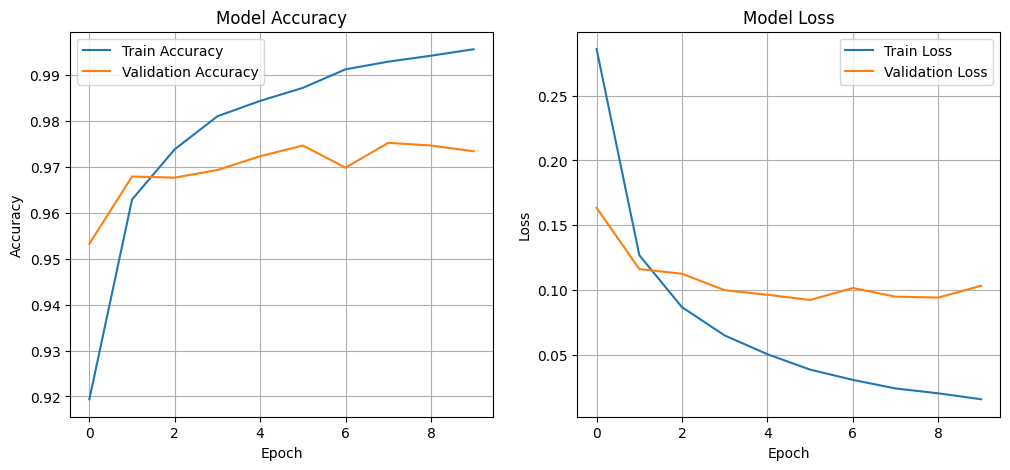

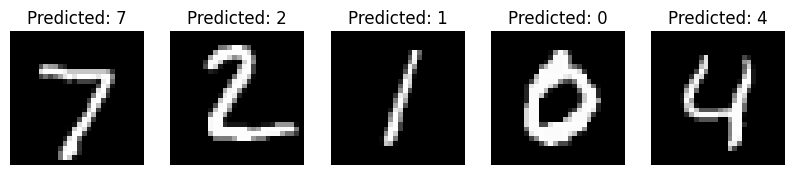

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28 * 28,)))
model.add(layers.Dense(128, activation='relu'))  # Hidden layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
print(f'Predicted classes for first 5 test images: {predicted_classes[:5]}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()


**Task 5: Gradient Descent and Backpropagation**

1. Gradient descent is an optimization algorithm used to minimize the loss function in machine learning and neural networks.

The goal of training a model is to find the optimal weights and biases that minimize the loss function, which quantifies the difference between the predicted outputs and the actual targets.

Gradient descent uses the information from the gradient to make informed updates to the model's parameters, gradually reducing the loss function.

2. Backpropagation is a key algorithm used for training neural networks. It efficiently computes the gradients needed for gradient descent. It calculates the gradients of the loss function with respect to the weights, enabling efficient updates of the weights during training, which allows the neural network to learn from the data.

**Task 6: Activation Functions**

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8214 - loss: 0.7242 - val_accuracy: 0.9339 - val_loss: 0.2422
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9328 - loss: 0.2314 - val_accuracy: 0.9454 - val_loss: 0.1931
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9498 - loss: 0.1744 - val_accuracy: 0.9566 - val_loss: 0.1519
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9610 - loss: 0.1345 - val_accuracy: 0.9621 - val_loss: 0.1328
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9692 - loss: 0.1079 - val_accuracy: 0.9653 - val_loss: 0.1186
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0884 - val_accuracy: 0.9684 - val_loss: 0.1072
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9804 - loss: 0.0713 - val_accuracy: 0.9699 - val_loss: 0.1023
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9835 - loss: 0.0607 

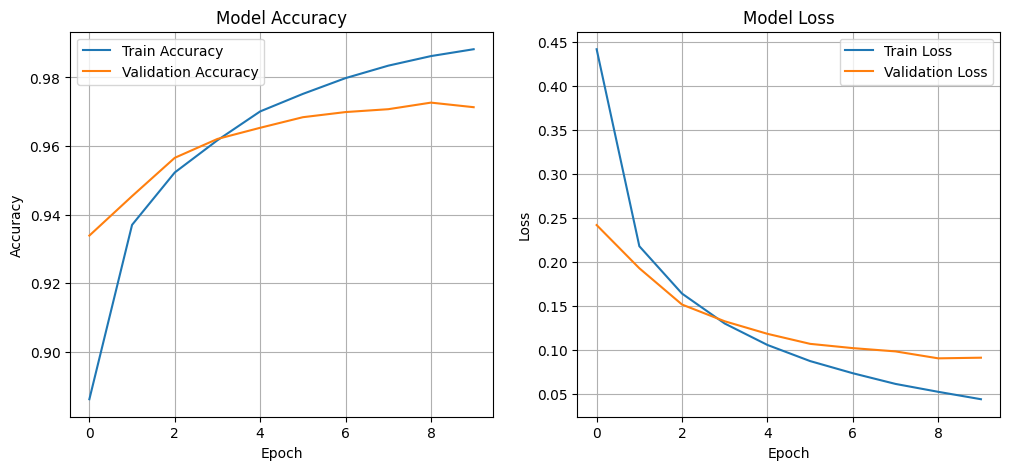

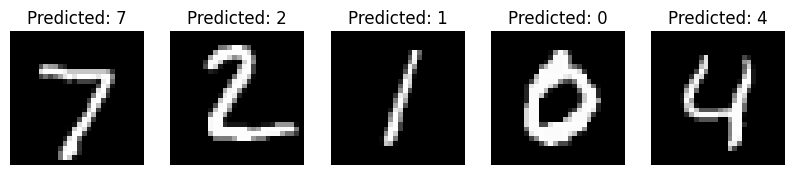

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28 * 28,)))
model.add(layers.Dense(128, activation='sigmoid'))  # Hidden layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
print(f'Predicted classes for first 5 test images: {predicted_classes[:5]}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8637 - loss: 0.4727 - val_accuracy: 0.9452 - val_loss: 0.1896
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9506 - loss: 0.1652 - val_accuracy: 0.9602 - val_loss: 0.1413
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9694 - loss: 0.1099 - val_accuracy: 0.9650 - val_loss: 0.1177
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9774 - loss: 0.0819 - val_accuracy: 0.9709 - val_loss: 0.0980
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0616 - val_accuracy: 0.9721 - val_loss: 0.0946
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9877 - loss: 0.0428 - val_accuracy: 0.9722 - val_loss: 0.0932
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9917 - loss: 0.0337 - val_accuracy: 0.9712 - val_loss: 0.0953
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9932 - loss: 0.0278 

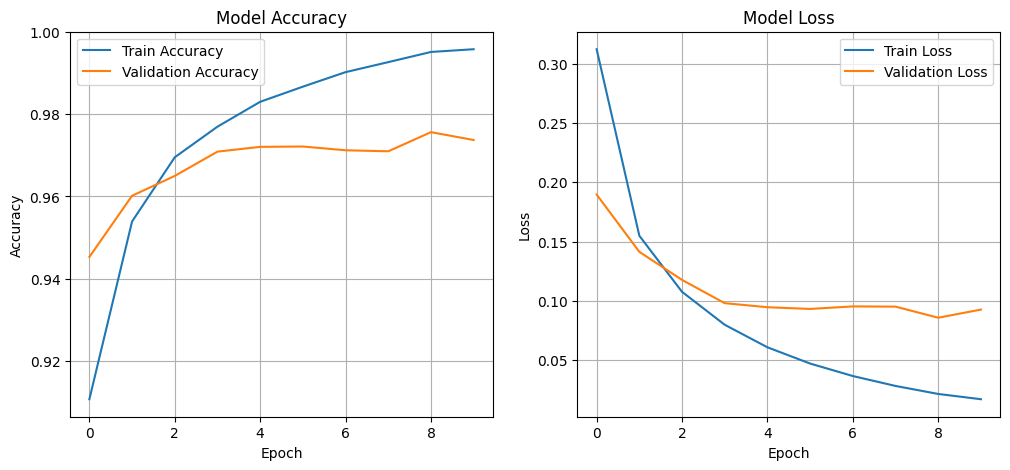

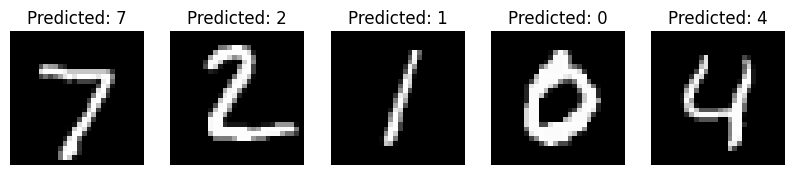

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(28 * 28,)))
model.add(layers.Dense(128, activation='tanh'))  # Hidden layer
model.add(layers.Dense(10, activation='softmax'))  # Output layer

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_accuracy:.4f}')

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
print(f'Predicted classes for first 5 test images: {predicted_classes[:5]}')

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.show()

plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.show()
